#detecting face using caffemodel


In [ ]:
import cv2

In [ ]:
ana = cv2.imread("/content/ana.jfif")

In [ ]:
from google.colab.patches import cv2_imshow

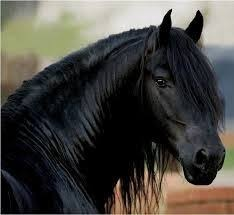

In [ ]:
horse = cv2.imread("/content/horse.jfif")
cv2_imshow(horse)

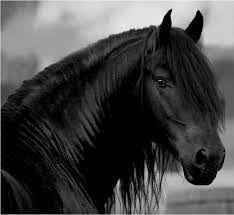

In [ ]:
horse2 = cv2.imread("/content/horse.jfif",0)
cv2_imshow(horse2)

In [ ]:
cv2.imwrite("horse2.image.jpg",horse2)

True

In [ ]:
import imutils

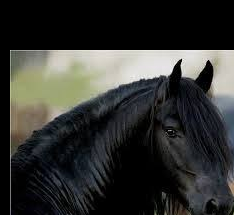

In [ ]:
trans = imutils.translate(horse,10,50)
cv2_imshow(trans)

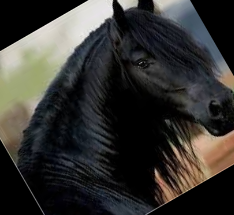

In [ ]:
rotate = imutils.rotate(horse,30)
cv2_imshow(rotate)

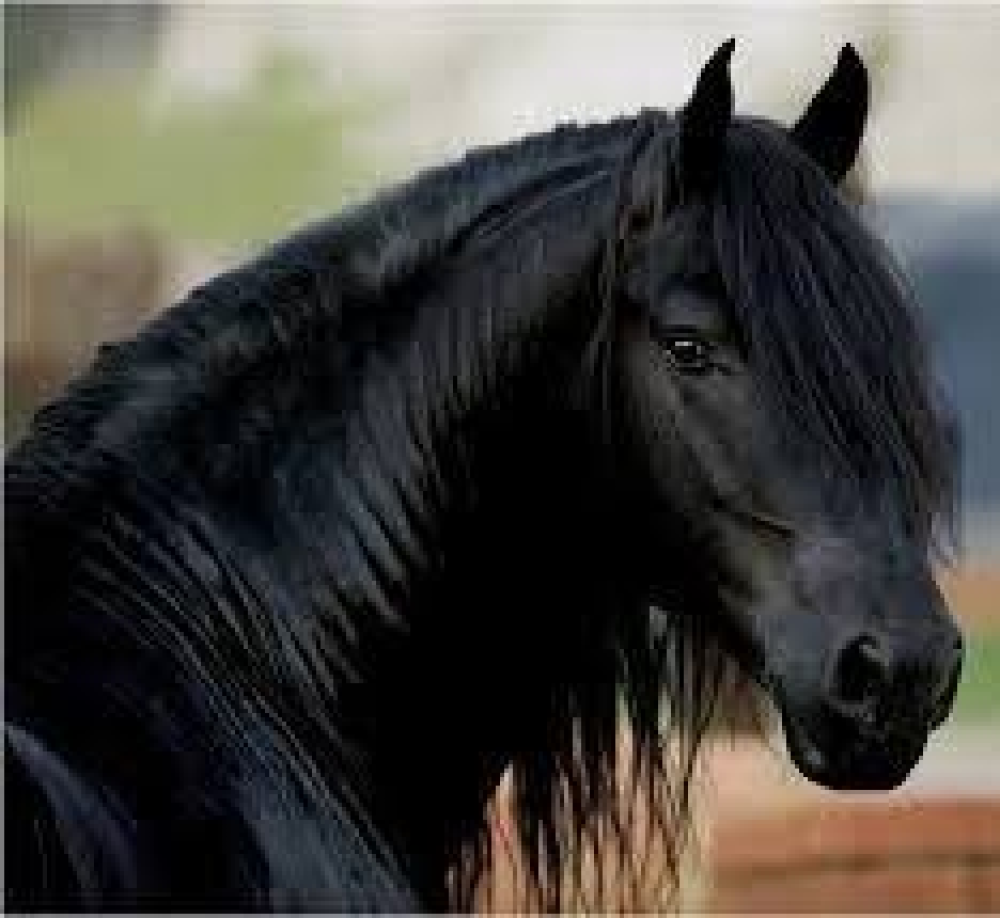

In [ ]:
resize = imutils.resize(horse,1000)
cv2_imshow(resize)

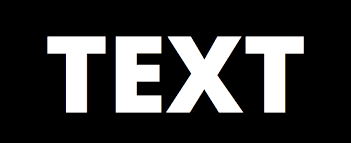

In [ ]:
txt = cv2.imread("/content/txt.png")
cv2_imshow(txt)

In [ ]:
skeleton = imutils.skeletonize(txt,size=(2,2))
cv2_imshow(skeleton)

error: ignored

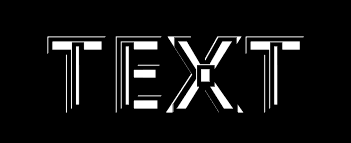

In [ ]:
gray = cv2.cvtColor(txt, cv2.COLOR_BGR2GRAY)
skeleton = imutils.skeletonize(gray, size=(10, 10))
cv2_imshow(skeleton)

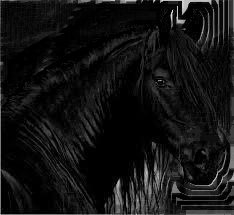

In [ ]:
gray1 = cv2.cvtColor(horse, cv2.COLOR_BGR2GRAY)
skeleton1 = imutils.skeletonize(gray1, size=(10, 10))
cv2_imshow(skeleton1)

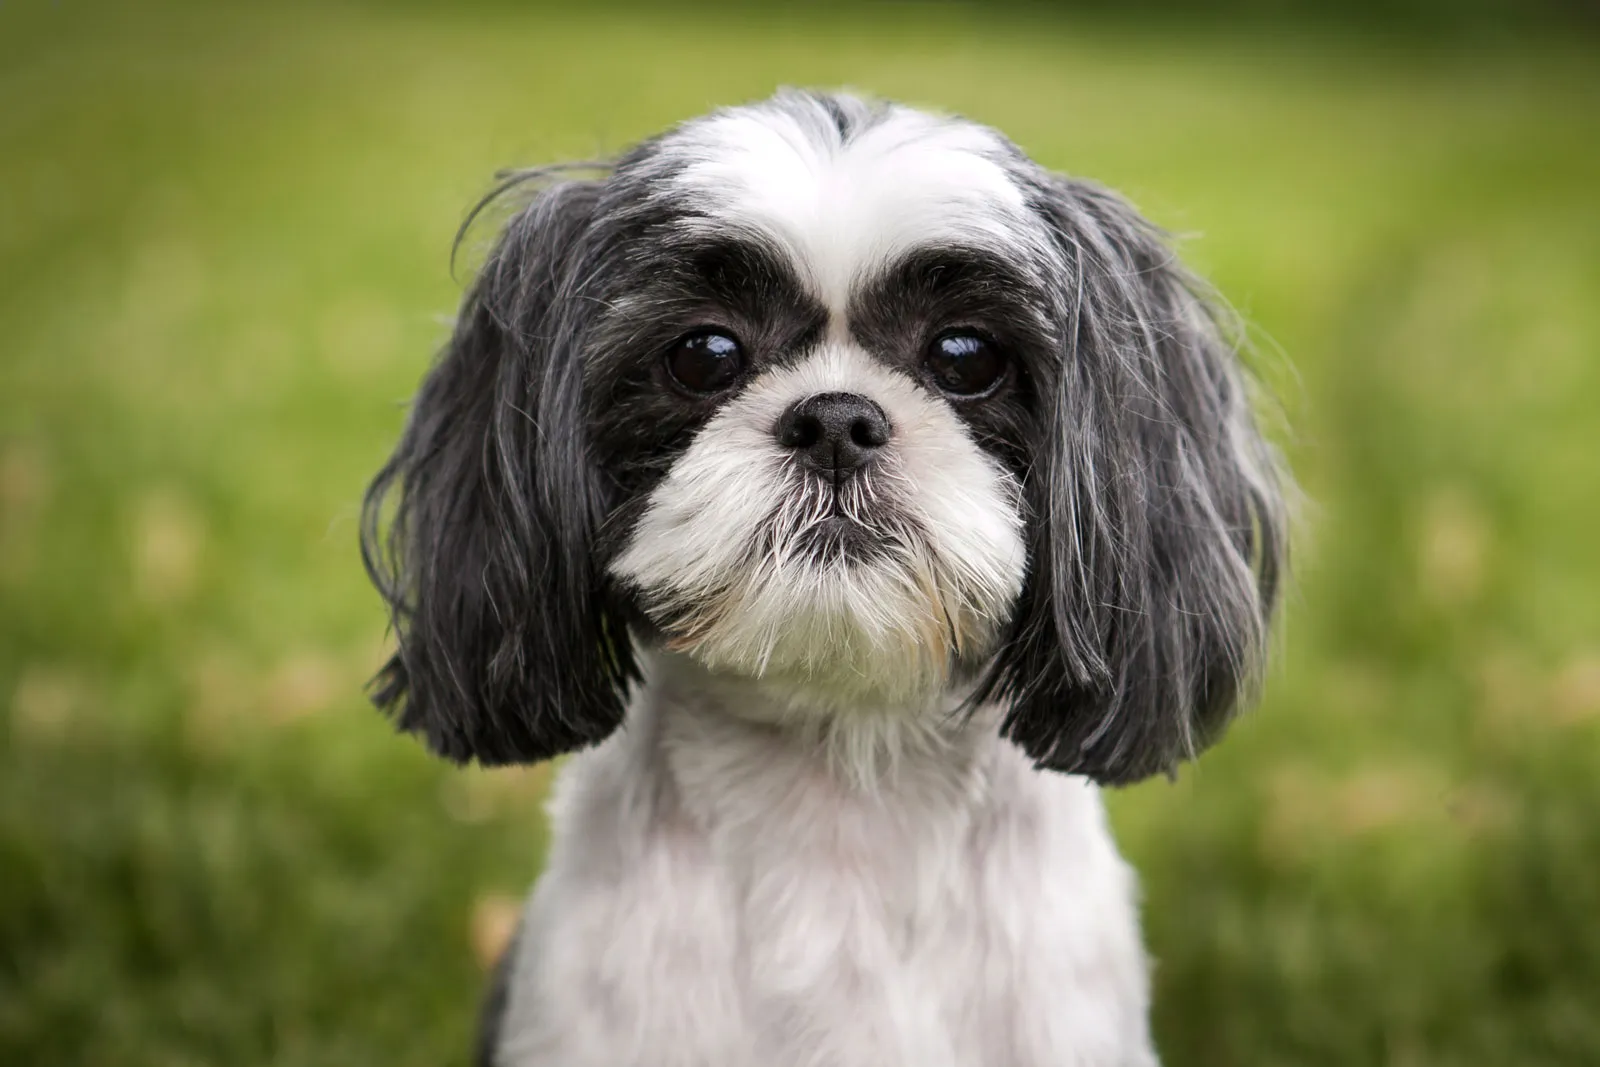

In [ ]:
tzu = cv2.imread("/content/shihtzu.webp")
cv2_imshow(tzu)

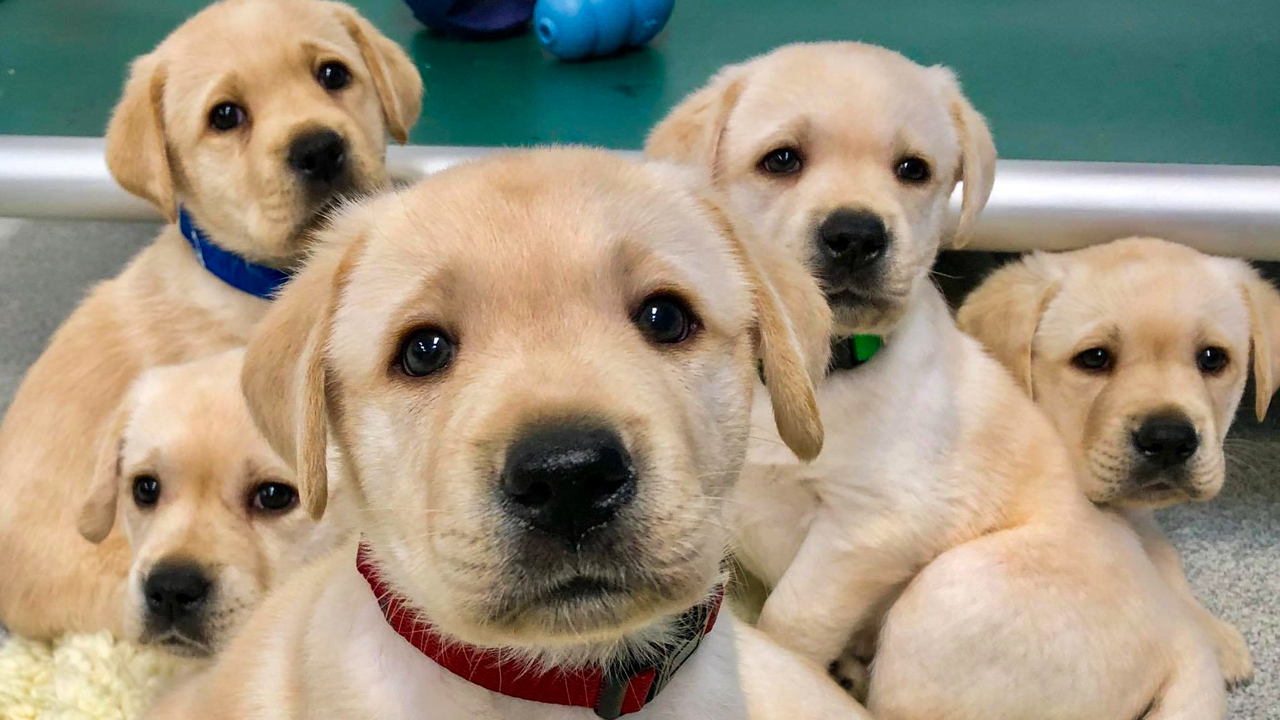

In [ ]:
puppies = cv2.imread("/content/puppies.jpg")
cv2_imshow(puppies)

In [ ]:
!wget -N https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
!wget -N https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel


--2022-09-12 09:24:13--  https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28104 (27K) [text/plain]
Saving to: ‘deploy.prototxt’

deploy.prototxt     100%[===================>]  27.45K  --.-KB/s    in 0s      

Last-modified header missing -- time-stamps turned off.
2022-09-12 09:24:13 (150 MB/s) - ‘deploy.prototxt’ saved [28104/28104]

--2022-09-12 09:24:14--  https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubuse

In [ ]:
prototxt = 'deploy.prototxt'
model = 'res10_300x300_ssd_iter_140000.caffemodel'
net = cv2.dnn.readNetFromCaffe(prototxt,model)

In [ ]:
(h, w) = puppies.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(puppies, (300, 300)), 1.0,
		(300, 300), (104.0, 177.0, 123.0))

In [ ]:
net.setInput(blob)
detections = net.forward()

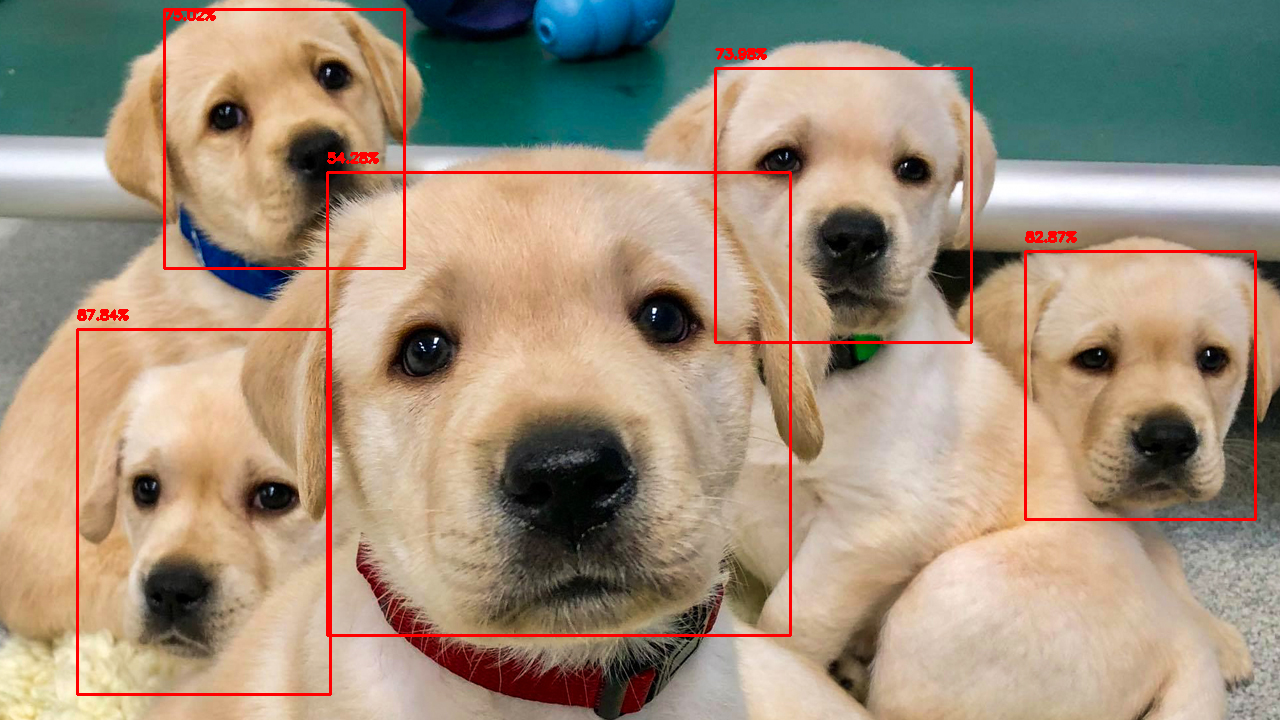

-1

In [ ]:
import numpy as np
# loop over the detections
for i in range(0, detections.shape[2]):
	# extract the confidence (i.e., probability) associated with the
	# prediction
	confidence = detections[0, 0, i, 2]
	# filter out weak detections by ensuring the `confidence` is
	# greater than the minimum confidence
	if confidence > 0.5:
		# compute the (x, y)-coordinates of the bounding box for the
		# object
		box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
		(startX, startY, endX, endY) = box.astype("int")
 
		# draw the bounding box of the face along with the associated
		# probability
		text = "{:.2f}%".format(confidence * 100)
		y = startY - 10 if startY - 10 > 10 else startY + 10
		cv2.rectangle(puppies, (startX, startY), (endX, endY),
			(0, 0, 255), 2)
		cv2.putText(puppies, text, (startX, y),
			cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
# show the output image
cv2_imshow(puppies)
cv2.waitKey(0)